In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2 as cv
from scipy import signal
from scipy.signal import find_peaks, peak_widths


In [6]:
im_gray = cv.imread('sunspot.jpeg',cv.IMREAD_GRAYSCALE)

im_size = len(im_gray)
im_shape = im_gray.shape
print(im_shape)

im_gray = im_gray[:im_shape[0],im_shape[1]-im_shape[0]:im_shape[1]]
print(im_gray.shape)

(1532, 1600)
(1532, 1532)


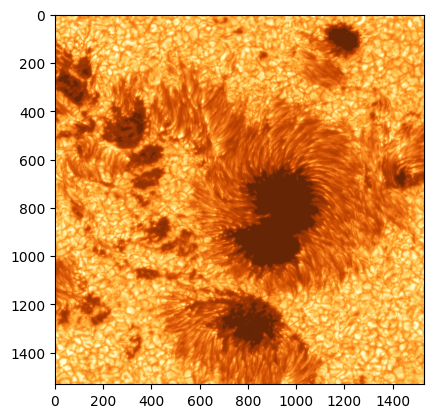

In [7]:
plt.imshow(im_gray,cmap='YlOrBr_r')

(1532, 1532)


Text(0.5, 1.0, 'Aperttura a Analizar: 10 Pixeles')

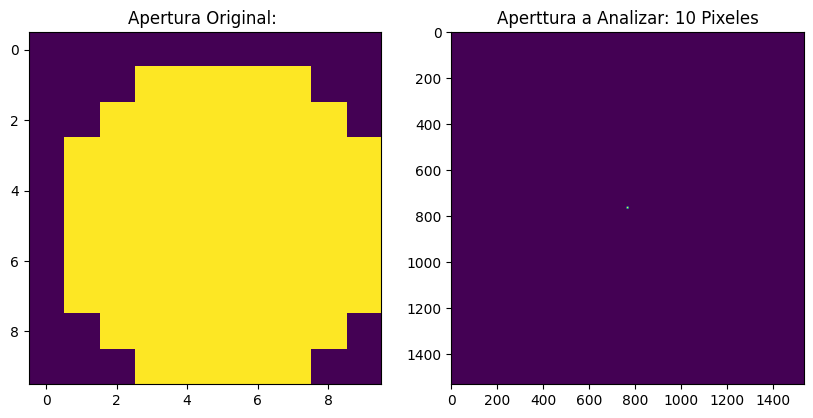

In [8]:
size_telescope = len(im_gray)
size_telescope = 10

#create circular aperture mask
x = np.arange(0, size_telescope)
y = np.arange(0, size_telescope)
arr = np.zeros((y.size, x.size))
diam = size_telescope
r= diam/2
mask = (x[np.newaxis,:]-size_telescope/2)**2 + (y[:,np.newaxis]-size_telescope/2)**2 < r**2

Collimated_Pupil_padded = np.pad(mask,pad_width=int((im_size - size_telescope)/2),mode='constant')
#Collimated_Pupil_padded = np.pad(mask,pad_width=0,mode='constant')

print(Collimated_Pupil_padded.shape)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
plt.set_cmap('viridis')
ax[0].imshow(mask)
ax[0].set_title('Apertura Original: ')
ax[1].imshow(abs(Collimated_Pupil_padded))
ax[1].set_title('Aperttura a Analizar: '+str(size_telescope)+' Pixeles')



In [9]:
f = np.fft.fft2(Collimated_Pupil_padded) #must be complex amplitude going in here
fshift = np.fft.fftshift(f)
intensity_image = (np.abs(fshift))**2

squaree lenght:  153


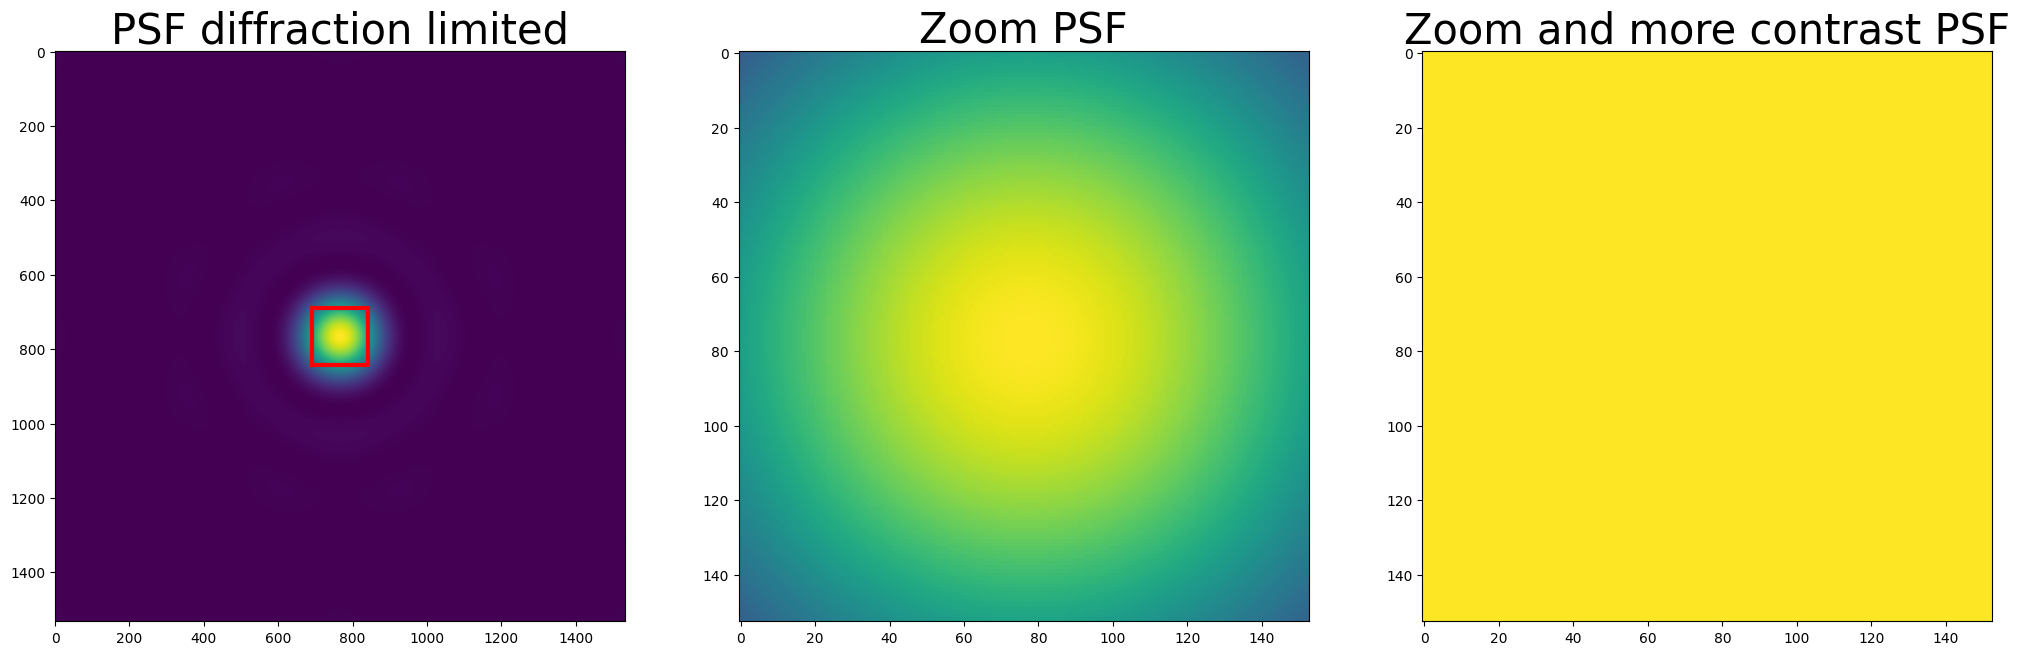

In [10]:
size = len(Collimated_Pupil_padded)

sq_lenght_pd = int((10*size)/100)
print('squaree lenght: ',sq_lenght_pd)
x_pd = size/2 - sq_lenght_pd/2
y_pd = x_pd

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(25,15))
plt.set_cmap('viridis')
ax[0].imshow(intensity_image)
#ax[0].set_title('PSF r0 = %i cm'%r0_cm,fontsize=40)
ax[0].set_title('PSF diffraction limited',fontsize=30)
rect_pd = patches.Rectangle((x_pd,y_pd), sq_lenght_pd, sq_lenght_pd, linewidth=3, edgecolor='r', facecolor='none')
ax[0].add_patch(rect_pd)

ax[1].imshow(intensity_image[int(y_pd):int(y_pd)+sq_lenght_pd,int(x_pd):int(x_pd)+sq_lenght_pd],vmax=np.max(intensity_image),vmin=np.min(intensity_image))
ax[1].set_title('Zoom PSF',fontsize=30)

ax[2].imshow(intensity_image[int(y_pd):int(y_pd)+sq_lenght_pd,int(x_pd):int(x_pd)+sq_lenght_pd],vmax=np.max(intensity_image)*0.05,vmin=np.min(intensity_image))
ax[2].set_title('Zoom and more contrast PSF',fontsize=30)

plt.show()


In [11]:
convolved_array = signal.convolve(im_gray, intensity_image*(1/np.max(intensity_image)),mode='same', method='auto')


Text(0.5, 1.0, 'Convolved Image')

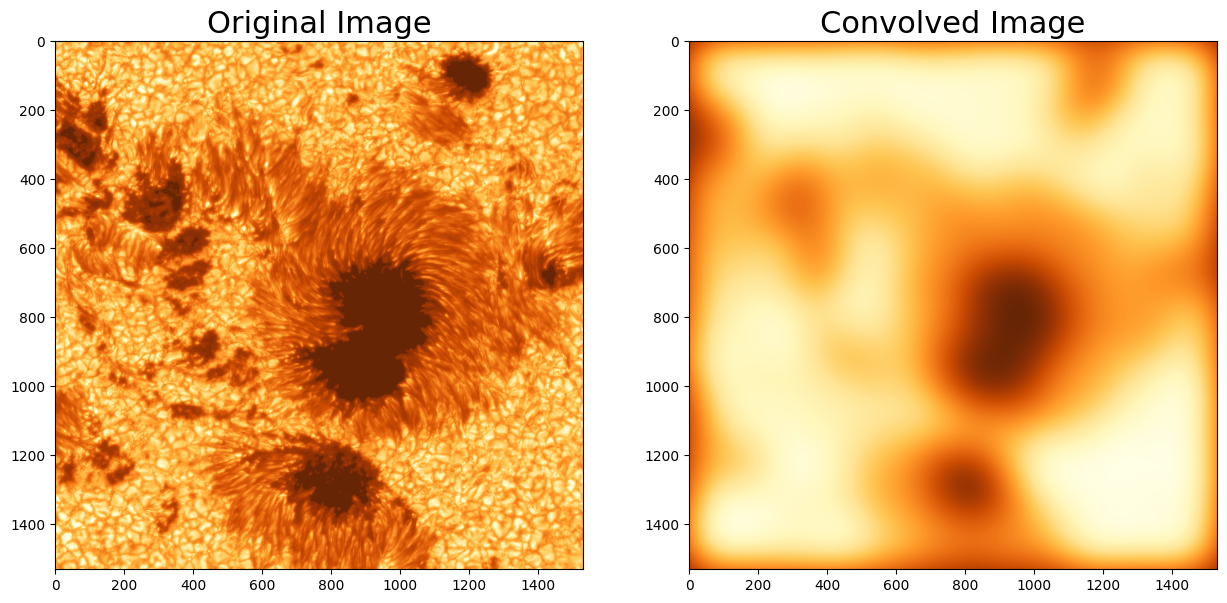

In [12]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.imshow(im_gray,cmap='YlOrBr_r')
ax1.set_title('Original Image',fontsize=22)
ax2.imshow(convolved_array,cmap='YlOrBr_r')
ax2.set_title('Convolved Image',fontsize=22)

